# Project 8 -- Colleen Malloy

**TA Help:** 
    
**Collaboration:** 

## Question 1

In [1]:
#1a
import pandas as pd
indy_climatedata_2006 = pd.read_csv("/anvil/projects/tdm/data/noaa_timeseries/indyclimatedata_2006.csv", low_memory=False)

indy_climatedata_2006.head()

#There is a backup lat and lon which is interesting. I wonder what those values are for. - Are they the back of the plane? 
#I think a lot of this is interesting and useful. The missing values I see are for things like weather, which they probably just didn't expereince that day.

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
0,USW00093819,2006-01-01T00:00:00,39.72517,-86.28168,241.1,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US",FM-15,335.0,1013.5,-2.0,...,S,1.26,mi,"PRECIP, SNOWFALL, SNOWDPTH, SNOWWTREQ",790,"SRG, SNOWSTICK, SNOWBOARD",39.7069,-86.2808,WFO IND,05/22/2007
1,USW00093819,2006-01-01T00:00:00,39.72517,-86.28168,241.1,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US",SOD,NaN,NaN,NaN,...,S,1.26,mi,"PRECIP, SNOWFALL, SNOWDPTH, SNOWWTREQ",790,"SRG, SNOWSTICK, SNOWBOARD",39.7069,-86.2808,WFO IND,05/22/2007
2,USW00093819,2006-01-01T00:00:00,39.72517,-86.28168,241.1,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US",SOM,NaN,NaN,NaN,...,S,1.26,mi,"PRECIP, SNOWFALL, SNOWDPTH, SNOWWTREQ",790,"SRG, SNOWSTICK, SNOWBOARD",39.7069,-86.2808,WFO IND,05/22/2007
3,USW00093819,2006-01-01T00:02:00,39.72517,-86.28168,241.1,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US",FM-16,343.0,1013.2,-2.0,...,S,1.26,mi,"PRECIP, SNOWFALL, SNOWDPTH, SNOWWTREQ",790,"SRG, SNOWSTICK, SNOWBOARD",39.7069,-86.2808,WFO IND,05/22/2007
4,USW00093819,2006-01-01T00:55:00,39.72517,-86.28168,241.1,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US",FM-15,343.0,1012.9,-2.2,...,S,1.26,mi,"PRECIP, SNOWFALL, SNOWDPTH, SNOWWTREQ",790,"SRG, SNOWSTICK, SNOWBOARD",39.7069,-86.2808,WFO IND,05/22/2007


In [2]:
#1b
indy_climatedata_2006.shape

(16764, 125)

In [3]:
pd.set_option('display.max_rows', None) 
indy_climatedata_2006.dtypes

STATION                                          object
DATE                                             object
LATITUDE                                        float64
LONGITUDE                                       float64
ELEVATION                                       float64
NAME                                             object
REPORT_TYPE                                      object
SOURCE                                          float64
HourlyAltimeterSetting                          float64
HourlyDewPointTemperature                       float64
HourlyDryBulbTemperature                        float64
HourlyPrecipitation                              object
HourlyPresentWeatherType                         object
HourlyPressureChange                            float64
HourlyPressureTendency                          float64
HourlyRelativeHumidity                          float64
HourlySkyConditions                              object
HourlySeaLevelPressure                          

In [4]:
#1c
indy_climatedata_2006['DATE'] = pd.to_datetime(indy_climatedata_2006['DATE'])

indy_climatedata_2006['DATE'].head()

0   2006-01-01 00:00:00
1   2006-01-01 00:00:00
2   2006-01-01 00:00:00
3   2006-01-01 00:02:00
4   2006-01-01 00:55:00
Name: DATE, dtype: datetime64[ns]

In [5]:
#1d
indy_climatedata_2006['DATE'].dt.date.nunique()

365

Markdown notes and sentences and analysis written here.

## Question 2

In [6]:
%%bash

ls /anvil/projects/tdm/data/noaa_timeseries/

indyclimatedata_2006.csv
indyclimatedata_2007.csv
indyclimatedata_2008.csv
indyclimatedata_2009.csv
indyclimatedata_2010.csv
indyclimatedata_2011.csv
indyclimatedata_2012.csv
indyclimatedata_2013.csv
indyclimatedata_2014.csv
indyclimatedata_2015.csv
indyclimatedata_2016.csv
indyclimatedata_2017.csv
indyclimatedata_2018.csv
indyclimatedata_2019.csv
indyclimatedata_2020.csv
indyclimatedata_2021.csv
indyclimatedata_2022.csv
indyclimatedata_2023.csv
indyclimatedata_2024.csv


In [7]:
#2a
import pandas as pd

def load_and_stack_climate_data(start_year=2006, end_year=2024, base_path="/anvil/projects/tdm/data/noaa_timeseries/"):
    dfs = []
    for year in range(start_year, end_year + 1):
        file_path = f"{base_path}indyclimatedata_{year}.csv"
        try:
            df = pd.read_csv(file_path, low_memory=False)
            df['year'] = year
            dfs.append(df)
        except FileNotFoundError:
            print(f"File not found for year {year}: {file_path}")
            continue
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

In [8]:
#2b
combined_df = load_and_stack_climate_data()

# Total number of rows
total_rows = len(combined_df)
print(f"Total rows in combined dataset: {total_rows}")

# Breakdown by year
yearly_counts = combined_df['year'].value_counts().sort_index()
print("\nRows per year:")
print(yearly_counts)


Total rows in combined dataset: 271895

Rows per year:
year
2006    16764
2007    14059
2008    14260
2009    14295
2010    14163
2011    14310
2012    13845
2013    14328
2014    14378
2015    14125
2016    14086
2017    13968
2018    14357
2019    14265
2020    14231
2021    14147
2022    14121
2023    13911
2024    14282
Name: count, dtype: int64


In [9]:
#2c
DF = combined_df = load_and_stack_climate_data()
columns_to_keep = ["DATE", "DailyAverageDryBulbTemperature", "DailyMaximumDryBulbTemperature", "DailyMinimumDryBulbTemperature", "DailyPrecipitation", "DailyAverageRelativeHumidity", "DailyAverageWindSpeed","DailySnowfall", "NAME"]

all_years_df_indy_climate = DF[columns_to_keep]

all_years_df_indy_climate.head()

,DATE,DailyAverageDryBulbTemperature,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPrecipitation,DailyAverageRelativeHumidity,DailyAverageWindSpeed,DailySnowfall,NAME
0,2006-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
1,2006-01-01T00:00:00,4.5,10.6,-1.7,0.0,74.0,5.1,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
2,2006-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
3,2006-01-01T00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
4,2006-01-01T00:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"


In [10]:
#There are multiple observations per day, but only one has a weather input. The rest are Na. I would just ignore Na entries

Increasing these values allows for more precise coloring and the image looks more like the clear image. It gets clearer and sharper the more I increase the K value and criteria parameters.

## Question 3

In [11]:
#3a

all_years_df_indy_climate.head(20)

,DATE,DailyAverageDryBulbTemperature,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPrecipitation,DailyAverageRelativeHumidity,DailyAverageWindSpeed,DailySnowfall,NAME
0,2006-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
1,2006-01-01T00:00:00,4.5,10.6,-1.7,0.0,74.0,5.1,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
2,2006-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
3,2006-01-01T00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
4,2006-01-01T00:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
5,2006-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
6,2006-01-01T01:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
7,2006-01-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
8,2006-01-01T02:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
9,2006-01-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"


In [12]:
# Create a list of weather-related columns to check
cols_to_check = [col for col in all_years_df_indy_climate.columns if col not in ["DATE", "NAME"]]

# Drop rows where all weather columns are missing
all_years_df_indy_climate = all_years_df_indy_climate.dropna(subset=cols_to_check, how='all')

In [13]:
all_years_df_indy_climate.head(20)

,DATE,DailyAverageDryBulbTemperature,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPrecipitation,DailyAverageRelativeHumidity,DailyAverageWindSpeed,DailySnowfall,NAME
1,2006-01-01T00:00:00,4.5,10.6,-1.7,0.0,74.0,5.1,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
54,2006-01-02T00:00:00,13.3,18.3,8.3,6.6,89.0,4.9,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
116,2006-01-03T00:00:00,7.0,8.3,5.6,0.5,96.0,NaN,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
177,2006-01-04T00:00:00,6.4,10.0,2.8,T,87.0,7.7,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
234,2006-01-05T00:00:00,1.7,3.3,0.0,T,82.0,5.8,T,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
291,2006-01-06T00:00:00,-0.8,0.0,-1.7,T,72.0,5.6,T,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
354,2006-01-07T00:00:00,2.0,6.7,-2.8,0.0,76.0,5.6,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
403,2006-01-08T00:00:00,7.0,15.0,-1.1,0.0,65.0,6.6,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
452,2006-01-09T00:00:00,5.8,9.4,2.2,0.0,77.0,5.1,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
506,2006-01-10T00:00:00,4.5,7.2,1.7,13.2,87.0,4.4,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"


In [14]:
# Convert DATE column to datetime format
all_years_df_indy_climate['DATE'] = pd.to_datetime(all_years_df_indy_climate['DATE'], errors='coerce')

# Preview the first few rows to confirm
print(all_years_df_indy_climate[['DATE']].head())

          DATE
1   2006-01-01
54  2006-01-02
116 2006-01-03
177 2006-01-04
234 2006-01-05


In [15]:
# Print the shape of the cleaned dataset
print(f"Dataset shape: {all_years_df_indy_climate.shape}")

# Display the range of dates
date_min = all_years_df_indy_climate['DATE'].min().date()
date_max = all_years_df_indy_climate['DATE'].max().date()
print(f"Date range: {date_min} to {date_max}")

Dataset shape: (6940, 9)
Date range: 2006-01-01 to 2024-12-31


## Question 4

In [16]:
all_years_df_indy_climate['DailyAverageDryBulbTemperature'].interpolate(method="time")

ValueError: time-weighted interpolation only works on Series or DataFrames with a DatetimeIndex

In [17]:
#DF = all_years_df_indy_climate
all_years_df_indy_climate["DATE"] = pd.to_datetime(all_years_df_indy_climate["DATE"]) # Ensure DATE is datetime format
all_years_df_indy_climate = all_years_df_indy_climate.set_index("DATE") # Set DATE as index
all_years_df_indy_climate["DailyAverageDryBulbTemperature"].interpolate(method='time', limit_direction='both')
# Preview a few rows to confirm interpolation
print(all_years_df_indy_climate["DailyAverageDryBulbTemperature"].head(10))

DATE
2006-01-01     4.5
2006-01-02    13.3
2006-01-03     7.0
2006-01-04     6.4
2006-01-05     1.7
2006-01-06    -0.8
2006-01-07     2.0
2006-01-08     7.0
2006-01-09     5.8
2006-01-10     4.5
Name: DailyAverageDryBulbTemperature, dtype: float64


In [ ]:
#all_years_df_indy_climate["DailyPrecipitation"].astype(float)

In [18]:
all_years_df_indy_climate.reset_index(inplace=True)

In [19]:
all_years_df_indy_climate["DailyPrecipitation"] = all_years_df_indy_climate["DailyPrecipitation"].replace("T", 0)
all_years_df_indy_climate["DailyPrecipitation"] = all_years_df_indy_climate["DailyPrecipitation"].astype(float)

In [20]:
all_years_df_indy_climate.head()

,DATE,DailyAverageDryBulbTemperature,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPrecipitation,DailyAverageRelativeHumidity,DailyAverageWindSpeed,DailySnowfall,NAME
0,2006-01-01,4.5,10.6,-1.7,0.0,74.0,5.1,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
1,2006-01-02,13.3,18.3,8.3,6.6,89.0,4.9,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
2,2006-01-03,7.0,8.3,5.6,0.5,96.0,NaN,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
3,2006-01-04,6.4,10.0,2.8,0.0,87.0,7.7,0.0,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"
4,2006-01-05,1.7,3.3,0.0,0.0,82.0,5.8,T,"INDIANAPOLIS INTERNATIONAL AIRPORT, IN US"


In [21]:
# Columns likely to contain "T" (trace amounts)
trace_cols = ["DailyPrecipitation", "DailySnowfall", "DailyAverageWindSpeed", "DailyAverageRelativeHumidity"]  # Adjust based on actual column names

for col in trace_cols:
    if col in all_years_df_indy_climate.columns:
        # Replace "T" with 0 and convert to float
       all_years_df_indy_climate[col] = (
            all_years_df_indy_climate[col]
            .replace("T", 0)
            .astype(float)
        )

# Confirm no non-numeric values remain
print(all_years_df_indy_climate[trace_cols].dtypes)

DailyPrecipitation              float64
DailySnowfall                   float64
DailyAverageWindSpeed           float64
DailyAverageRelativeHumidity    float64
dtype: object


A variance ratio method looks for points where the variance reduction slows down. This could be a different way to find optimal K.

## Question 5

In [22]:
#5a
all_years_df_indy_climate['DailyAverageDryBulbTemperature_Farenheit'] = (all_years_df_indy_climate['DailyAverageDryBulbTemperature'] * 9/5 +32)

all_years_df_indy_climate['DailyAverageDryBulbTemperature_Farenheit'].head(10)

0    40.10
1    55.94
2    44.60
3    43.52
4    35.06
5    30.56
6    35.60
7    44.60
8    42.44
9    40.10
Name: DailyAverageDryBulbTemperature_Farenheit, dtype: float64

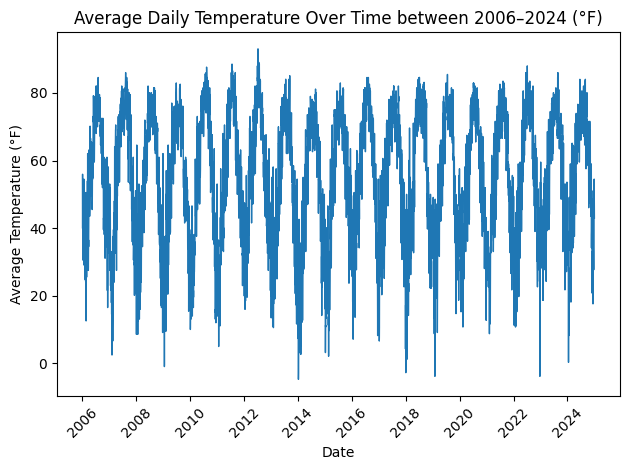

In [23]:
import matplotlib.pyplot as plt
plt.plot(all_years_df_indy_climate['DATE'], all_years_df_indy_climate['DailyAverageDryBulbTemperature_Farenheit'], linewidth=1) # For YOU to Fill in

plt.title('Average Daily Temperature Over Time between 2006–2024 (°F)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

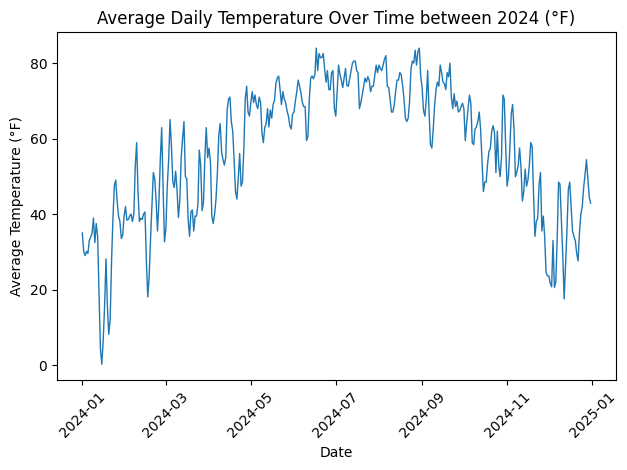

In [26]:
import matplotlib.pyplot as plt
df_2024 = all_years_df_indy_climate[all_years_df_indy_climate['DATE'].dt.year == 2024]

plt.plot(df_2024['DATE'], df_2024['DailyAverageDryBulbTemperature_Farenheit'], linewidth=1) # For YOU to Fill in

plt.title('Average Daily Temperature Over Time between 2024 (°F)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The average temperature is highest during the summer months and lowest during the winter months. There are some spikes which we call "fake springs" or "fake falls" when we have that one nicer day in the winter time or the one cooler day in the summer time. Overall, the curve follows the typical average temperature for the seasons of the year. 

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.

In [ ]:
Colleen